In [2]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [19]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [120]:
speal_length = iris['data'][:,0]
sepal_width  = iris['data'][:,1]
petal_length = iris['data'][:,2]
petal_width  = iris['data'][:,3]

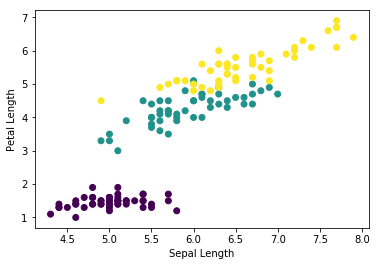

In [121]:
c = iris['target']
plt.scatter(speal_length,petal_length, c=c)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.show()

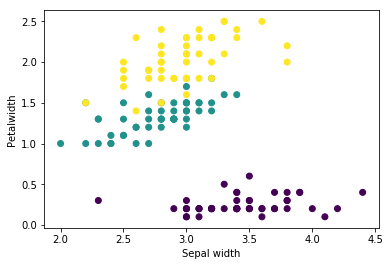

In [122]:
plt.scatter(sepal_width ,petal_width, c=c)
plt.xlabel('Sepal width')
plt.ylabel('Petalwidth')
plt.show()

In [123]:
X = np.column_stack((speal_length,sepal_width,petal_length,petal_width))
y = iris.target

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [125]:
clf = svm.SVC(kernel = 'linear',C=1)
clf.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [126]:
y_pred = clf.predict(X_test)

In [127]:
clf.score(X_test, y_test)

0.9736842105263158

In [128]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Accuracy: 98.00 %
Standard Deviation: 4.00 %
